# Visualization

Data visualization as you probably know is one the most important steps in the scientific process. Without proper mediums for visualization, your message will be difficult to get across to your audience. Here we explore the many different ways to plot and visualize our prepared neuro data. The topics include:

* Scatter plots
* Bar charts and histograms
* Box-whisker and violin plots
* Lineplots and heatmaps
* Interactive plots


In [313]:
import matplotlib.pyplot as plt
import plotly.express as px

import os
import glob
import tifffile as tiff
import numpy as np
import pandas as pd

In [314]:
df_gene_expr = pd.read_csv('sample_data/gene-expr.csv')
df_gene_expr.head()

myAUC  avg_diff  power  cluster           gene
0  0.897  1.622876  0.794        0           Gad2
1  0.861  1.151010  0.722        0  A030009H04Rik
2  0.857  1.025466  0.714        0         Nap1l5
3  0.845  1.056095  0.690        0          Zwint
4  0.839  0.980689  0.678        0        Zcchc18

Text(0, 0.5, 'avg_diff')

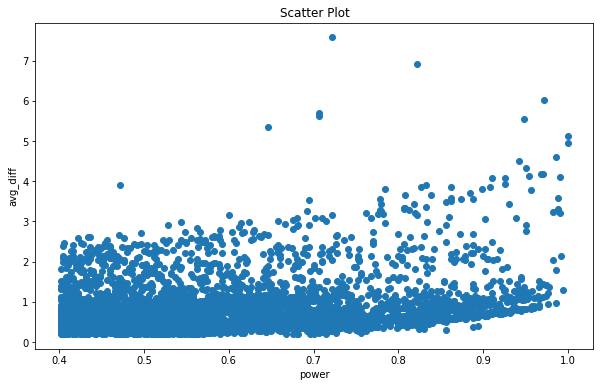

In [315]:
# Scatter plot with day against tip
plt.figure(figsize=(10,6))
plt.scatter(df_gene_expr['power'], df_gene_expr['avg_diff'])

# Adding Title to the Plot
plt.title("Scatter Plot")
#plt.title("Scatter Plot", fontsize=20) # COMMENT IN FOR LARGER FONTSIZE!
 
# Setting the X and Y labels
plt.xlabel('power')
plt.ylabel('avg_diff')
 

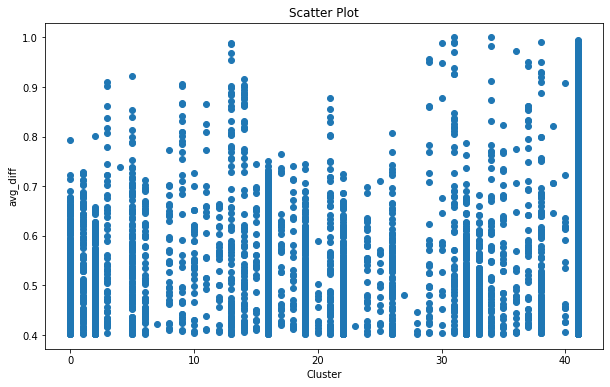

In [316]:
# Scatter plot with day against tip
plt.figure(figsize=(10,6))
plt.scatter(df_gene_expr['cluster'], df_gene_expr['power'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
#plt.title("Scatter Plot", fontsize=20) # COMMENT IN FOR LARGER FONTSIZE!
 
# Setting the X and Y labels
plt.xlabel('Cluster')
plt.ylabel('avg_diff')
 
plt.show()

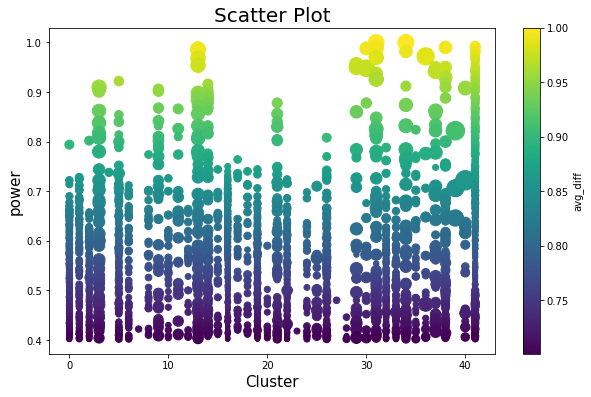

In [317]:
# Scatter plot with day against tip
plt.figure(figsize=(10,6))
plt.scatter(df_gene_expr['cluster'], df_gene_expr['power'], c=df_gene_expr['myAUC'], s=df_gene_expr['avg_diff']*50) # REPLACE c for s for size modulation
 
# Adding Title to the Plot
plt.title("Scatter Plot", fontsize=20)
 
# Setting the X and Y labels
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('power', fontsize=15)
 
obj_cbar = plt.colorbar()
obj_cbar.set_label('avg_diff')
 
plt.show()

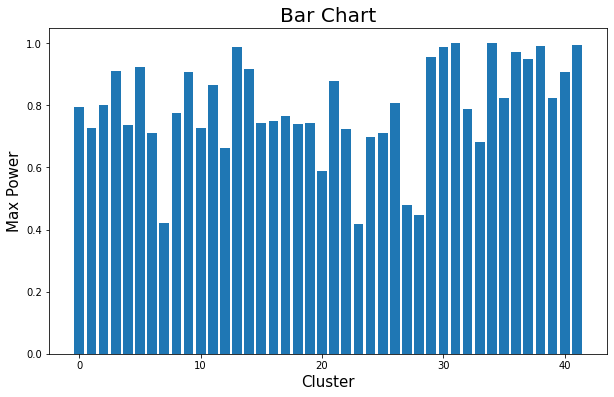

In [318]:
# Bar chart with max power against cluster
plt.figure(figsize=(10,6))
plt.bar(df_gene_expr['cluster'], df_gene_expr['power'])

plt.title("Bar Chart", fontsize=20)
 
# Setting the X and Y labels
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Max Power', fontsize=15)
 
# Adding the legends
plt.show()

[Text(1, 0, 'myAUC'), Text(2, 0, 'avg_diff'), Text(3, 0, 'power')]

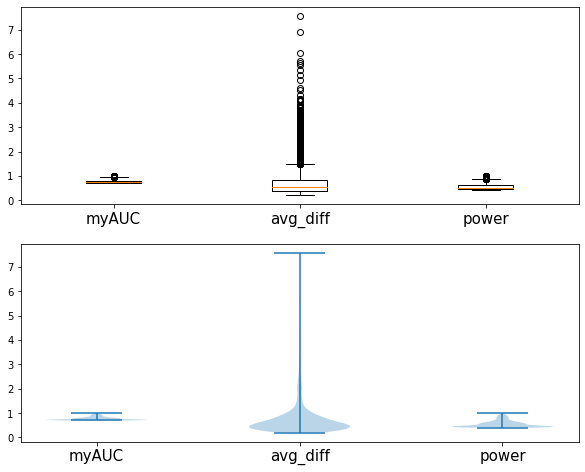

In [319]:
fig, ax = plt.subplots(nrows=2, ncols=1, 
                           figsize=(10,8))
ax[0].boxplot(df_gene_expr.loc[:,'myAUC':'power'], labels=df_gene_expr.columns[:3]);
ax[0].tick_params(axis='x', labelsize=15)

ax[1].violinplot(df_gene_expr.loc[:,'myAUC':'power']);
ax[1].set_xticks([1,2,3])
ax[1].set_xticklabels(df_gene_expr.columns[:3], fontsize=15)

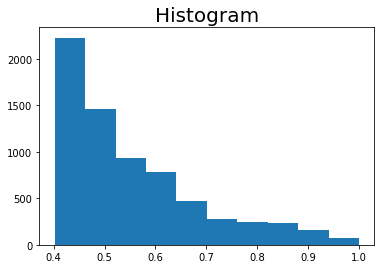

In [320]:
# histogram of total_bills
plt.hist(df_gene_expr['power'])
 
plt.title("Histogram", fontsize=20)
 
# Adding the legends
plt.show()

### Time-series with plots

In [321]:
# Calcium imaging data
ca_data = np.loadtxt('sample_data/ca-traces.txt', delimiter=',')
ca_data

array([[0.      , 0.      , 0.      , ..., 0.088158, 0.086061, 0.084013],
       [0.      , 0.      , 0.      , ..., 4.1345  , 4.0528  , 3.9727  ],
       [0.      , 0.      , 0.      , ..., 0.013022, 0.011969, 0.011   ],
       ...,
       [1.3212  , 1.3105  , 1.2998  , ..., 3.3591  , 3.3317  , 3.3047  ],
       [0.      , 0.      , 0.      , ..., 1.5934  , 1.5588  , 3.0216  ],
       [0.      , 0.4496  , 0.41749 , ..., 0.45179 , 0.41952 , 0.38956 ]])

Text(0, 0.5, 'Fluorescence')

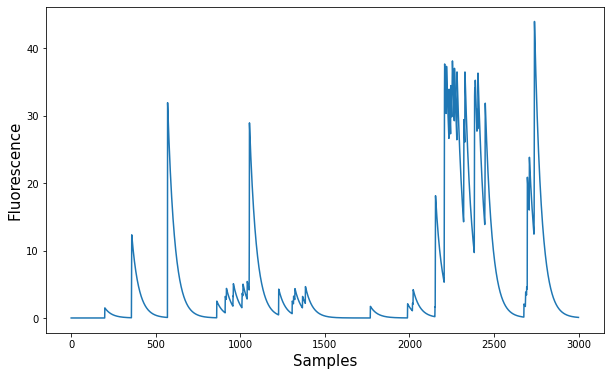

In [322]:
plt.figure(figsize=(10,6))
plt.plot(ca_data[0,:])

plt.xlabel('Samples', fontsize=15)
plt.ylabel('Fluorescence', fontsize=15)

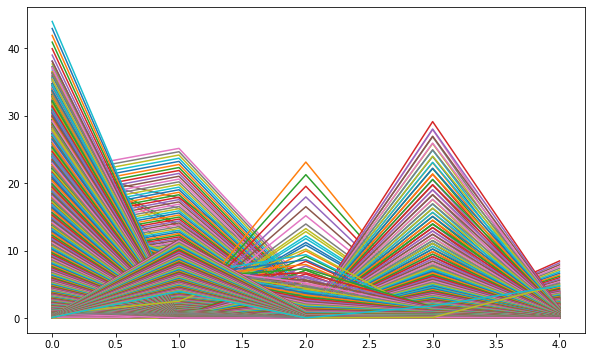

In [323]:
plt.figure(figsize=(10,6))
plt.plot(ca_data[:5,:]);

In [324]:
ca_data[:5,:].shape

(5, 3000)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Parameters:

    x, y: array-like or scalar

        The horizontal / vertical coordinates of the data points. x values are optional and default to range(len(y)).

        Commonly, these parameters are 1D arrays.

        They can also be scalars, or two-dimensional (in that case, the columns represent separate data sets).

        These arguments cannot be passed as keywords.


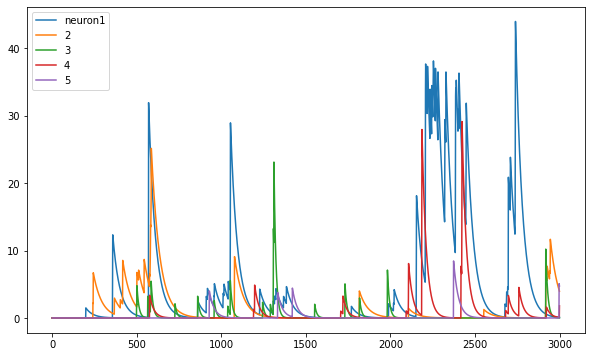

In [325]:
plt.figure(figsize=(10,6))
plt.plot(np.transpose(ca_data[:5,:]));
plt.legend(['neuron1', '2', '3', '4', '5']) # in general avoid hardcoding - bonus exercise: automate this list creation using list comprehension and string concatenation

In [326]:
colors_string = ['r', 'g', 'b', 'k', 'y']
colors_linspace = plt.cm.viridis(np.linspace(0,1,5))

What happens when you swap the color variable from `colors_string` to `colors_linspace`?

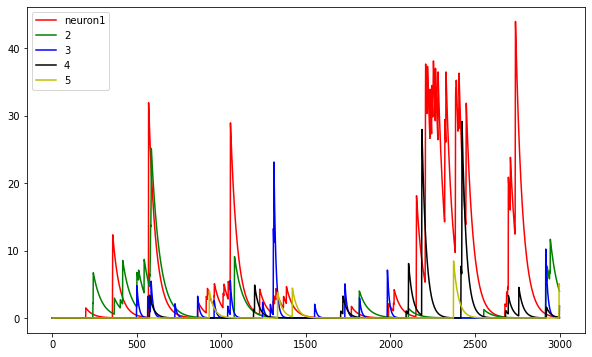

In [327]:
plt.figure(figsize=(10,6))
for idx_line in range(5):

    plt.plot(np.transpose(ca_data[idx_line,:]), color=colors_string[idx_line]); 

plt.legend(['neuron1', '2', '3', '4', '5']) 

In [328]:
mean_roi_trace = np.mean(ca_data, axis=0)
stderr_roi_trace = np.std(ca_data, axis=0)/np.sqrt(ca_data.shape[0])

Text(0, 0.5, 'Fluorescence')

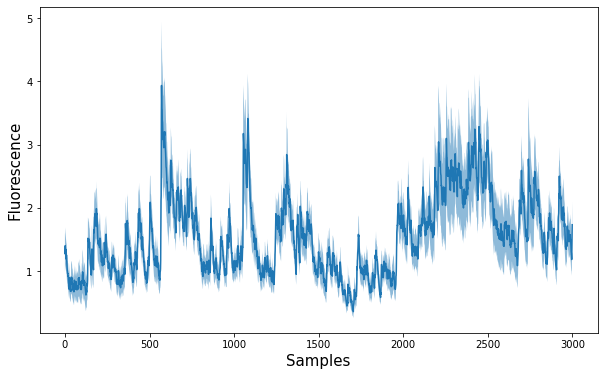

In [329]:
plt.figure(figsize=(10,6))
plt.plot(mean_roi_trace)
plt.fill_between(np.arange(len(mean_roi_trace)), mean_roi_trace - stderr_roi_trace, mean_roi_trace + stderr_roi_trace, alpha=0.5) # this plots the shaded error bar

plt.xlabel('Samples', fontsize=15)
plt.ylabel('Fluorescence', fontsize=15)

### A few other decorations

In [330]:
min_idx = np.argmin(mean_roi_trace)

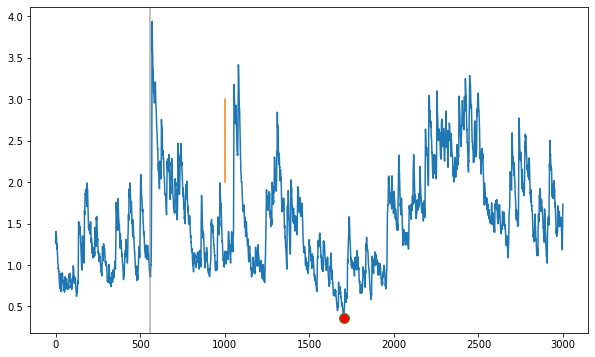

In [331]:
plt.figure(figsize=(10,6))
plt.plot(mean_roi_trace)

plt.axvline(560, color='0.5', alpha=0.65)
plt.plot([1000,1000], [2,3])

plt.plot(min_idx, mean_roi_trace[min_idx], marker="o", markersize=10, markerfacecolor="red")

We can use the following plot function to create rasterplots too

Text(0, 0.5, 'Neuron')

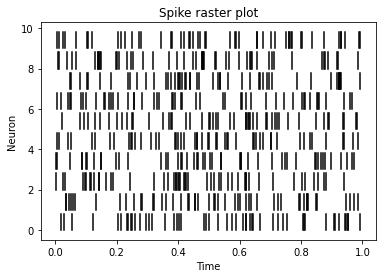

In [332]:
# generate 50 random spike times for 10 cells 
spike_times = np.random.random([10, 50])
                
# Draw a spike raster plot
for neuron in range(spike_times.shape[0]):
    for spike in range(spike_times.shape[1]):
        spk_time = spike_times[neuron, spike]
        plt.plot([spk_time, spk_time], [neuron, neuron+0.8], color='k')

#plt.eventplot(spike_times, color='k', linelengths = 0.8) # similar output using a dedicated function

plt.title('Spike raster plot')
plt.xlabel('Time')
plt.ylabel('Neuron')

### Heatmaps to better visualize multiple stacked time-series

Text(0, 0.5, 'Neuron #')

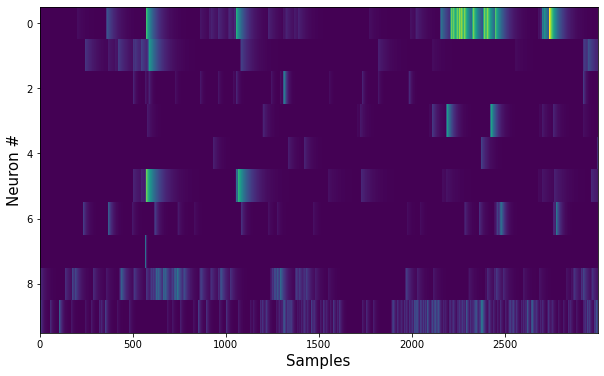

In [333]:
plt.figure(figsize=(10,6))
plt.imshow(ca_data[:10,:], aspect='auto', interpolation='none') # without setting interp to none, there will be blurring

plt.xlabel('Samples', fontsize=15)
plt.ylabel('Neuron #', fontsize=15)

In [334]:
file_dir = r'sample_data\VJ_OFCVTA_7_260_D6_cropped'
search_path = os.path.join(file_dir,"*.tif")
glob_list = sorted(glob.glob(search_path))
data_2p = np.empty([len(glob_list),142,247])

for frame_counter, frame_path in enumerate(glob_list):
    data_2p[frame_counter,:,:] = tiff.imread(frame_path)

### Subplots, plotting images, and adjusting color limits

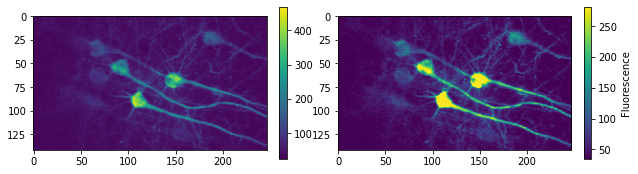

In [335]:
mean_data_2p = np.mean(data_2p, axis=0)

fig, ax = plt.subplots(1,2, figsize=(10,6))
obj_im_vanilla = ax[0].imshow(mean_data_2p)
plt.colorbar(obj_im_vanilla, ax=ax[0], fraction=0.03) # fraction makes the cbar smaller

obj_im_scale = ax[1].imshow(mean_data_2p)
obj_cbar = plt.colorbar(obj_im_scale, ax=ax[1], fraction=0.03) 
obj_cbar.set_label('Fluorescence')
obj_im_scale.set_clim(vmin=np.min(mean_data_2p)*1.4, 
                vmax=np.max(mean_data_2p)*0.6)

# plt.tight_layout()

### Plotly for interactive visualization (mainly for exploratory analysis)

In [336]:
series_mean_ca_data = pd.Series(data=mean_roi_trace)
series_mean_ca_data

0       1.282338
1       1.355593
2       1.403774
3       1.328334
4       1.257703
          ...   
2995    1.234141
2996    1.184308
2997    1.395678
2998    1.574116
2999    1.734695
Length: 3000, dtype: float64

In [337]:
newnames = {'0': 'mean data'}

fig = px.line(series_mean_ca_data,  title='Mean Ca2+ Data', labels=dict(value="Fluorescence", index="Sample") )
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

In [338]:
fig = px.imshow(np.mean(data_2p, axis=0), color_continuous_scale='gray')
fig.show()

In [339]:
fig = px.imshow(data_2p, animation_frame=0, binary_string=True, labels=dict(animation_frame="Frame"))
fig.show()